# Семинар 1 (11.09.2025)
# `PyMol. Основы представления молекул. Синтаксис. Первый взгляд на Uniprot/RCSB и PDB`

# 1. Базы данных белковых структур

## 1.1 База данных RCSB PDB

### Краткая информация
https://www.rcsb.org/ 

**RCSB PDB (RCSB.org, Research Collaboratory for Structural Bioinformatics)** — американский центр обработки данных глобального архива **Protein Data Bank (PDB)** с данными о трехмерной структуре крупных биологических молекул (белков, ДНК и РНК), которые необходимы для исследований и образования в области фундаментальной биологии, здравоохранения, энергетики и биотехнологий.

<img src="Prac1/images/rcsb-pdb.png" alt="drawing" style="width:500px;"/> 

*The Vision of the RCSB PDB is to expand the frontiers of fundamental biology, biomedicine, energy sciences, and biotechnology through open and sustainable access to 3D biostructure information stored in the Protein Data Bank (PDB) archive and generated using artificial intelligence/machine complemented with functional and evolutionary insights from trusted external resources.*

Количество структур в PDB растет с каждым годом, в настоящее время их уже больше 240к. 

<img src="Prac1/images/pdb_statistics.png" alt="drawing" style="width:500px;"/> 

*PDB Statistics: Overall Growth of Released Structures Per Year  https://www.rcsb.org/stats/growth/growth-released-structures*

PDB содержит структуры: 
* В основном - полученные экспериментально методами рентгеновской кристаллографии (X-ray), ЯМР и криоэлектронной микроскопии (Cryo-EM)
* Computed Structure Models (CSM) из [AlphaFold DB](https://alphafold.ebi.ac.uk/) и [ModelArchive](https://modelarchive.org/)
* Integrative 3D Structures - полученные комбинацией экспериментальных и вычислительных методов

### Как устроен PDB

* У каждой структуры есть идентификатор (PDB ID) - четыре символа: цифры и заглавные буквы. Например, белок 8GFA

* Примечание: планируется сделать код 8-значным (extended PDB ID codes), когда 4-значные закончатся 

* Пример: https://www.rcsb.org/structure/8GFA

### Формат файлов PDB

Файл структуры содержит координаты центров атомов (в некоторой произвольной системе координат) и сопровождающую информацию

<img src="Prac1/images/Pdb-file-format.png" alt="drawing" style="width:500px;"/> 

In [ ]:
! awk 'NR >= 4193 && NR <= 4200' Prac1/8GFA.pdb

ATOM      1  N   TYR A 199      75.705  61.480 125.618  1.00104.49           N  
ATOM      2  CA  TYR A 199      75.940  62.950 125.635  1.00104.49           C  
ATOM      3  C   TYR A 199      76.855  63.299 126.789  1.00104.49           C  
ATOM      4  O   TYR A 199      77.846  64.009 126.626  1.00104.49           O  
ATOM      5  CB  TYR A 199      74.625  63.712 125.755  1.00104.49           C  
ATOM      6  CG  TYR A 199      74.810  65.205 125.677  1.00104.49           C  
ATOM      7  CD1 TYR A 199      75.145  65.802 124.479  1.00104.49           C  
ATOM      8  CD2 TYR A 199      74.652  66.015 126.791  1.00104.49           C  


## 1.2. Uniprot 

https://www.uniprot.org/


**Universal Protein Resource (UniProt)** – это комплексный ресурс данных о последовательностях белков и их аннотациях. Он создан в коллаборации EMBL-EBI (European Bioinformatics Institute), SIB (Swiss Institute of Bioinformatics) и PIR (Protein Information Resource)

<img src="Prac1/images/uniprot.png" alt="drawing" style="width:500px;"/> 


### База данных UniProt Knowledgebase (UniProtKB)

* UniProtKB содержит два раздела: 
    * **Swiss-Prot** - карточки белков, проаннотированные вручную экспертами
    * **TrEMBL** -карточки белков, сформированные автоматическими средствами

* В UniProtKB есть информация о белках различных организмов:

    <img src="Prac1/images/uniprot_stat.png" alt="drawing" style="width:500px;"/> 

    *https://www.uniprot.org/uniprotkb?groupBy=taxonomy&query=* *



* Карточка белка включает в себя информацию по: 
    * Последовательности
    * Функциям
    * Локализации в клетке
    * Пост-трансляционным модификациям
    * Экспрессии
    * Взаимодействиям белка и т.д



* Идентификаторы белка могут быть двух типов:
    * шесть знаков: цифры и заглавные буквы
    * короткое название белка_организм

    Пример: белок TRPV1 человека - Q8NER1 и TRPV1_HUMAN, мыши - Q704Y3 и TRPV1_MOUSE.

# 2. Работа с Pymol

## 2.1. Установка

* https://www.pymol.org/ 
* https://pymol.org/edu/ - образовательная лицензия

## 2.2. Полезные материалы

* Документация Pymol wiki: 
    * http://pymolwiki.org/ - официальная, работает только через VPN
    * https://wiki.pymol.org/index.php/Main_Page - зеркало

* Файлы в папке Materials на github курса

## 2.3. Краткий список команд

## 2.4. Картинка из статьи

Задача: повторить картинку из статьи https://doi.org/10.1038/s41467-023-38162-9

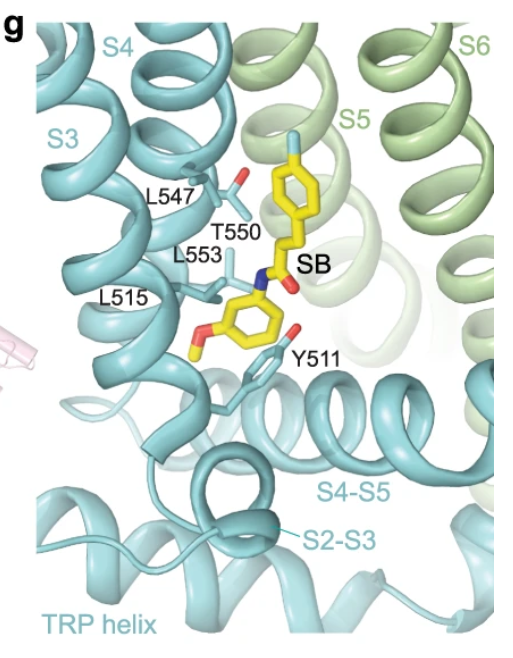

In [7]:
import pymol
from pymol import cmd

In [ ]:
cmd.delete('all')
PDB_ID = '8GFA'
cmd.fetch(PDB_ID)
cmd.do(f'''
bg_color white
remove solvent
sele ligand, resn ZEI and chain A
hide everything, not polymer.protein and not ligand 
util.cbay ligand
center ligand
origin ligand
zoom ligand

show sticks, chain A and resi 511+515+553+547+550
hide everything, hydrogens
set ray_trace_mode, 1
set ray_shadow, off
#png Prac1/pic1.png
#save Prac1/prac1.pse
''')

PyMOL>bg_color white
PyMOL>remove solvent
 Remove: eliminated 105 atoms in model "8GFA".
PyMOL>sele ligand, resn ZEI and chain A
 Selector: selection "ligand" defined with 34 atoms.
PyMOL>hide everything, not polymer.protein and not ligand 
PyMOL>util.cbay ligand
 Executive: Colored 18 atoms.
 Executive: Colored 16 atoms.
PyMOL>center ligand
PyMOL>origin ligand
PyMOL>zoom ligand
PyMOL>show sticks, chain A and resi 511+515+553+547+550
PyMOL>hide everything, hydrogens
PyMOL>png Prac1/pic1.png
 Ray: render time: 2.71 sec. = 1330.1 frames/hour (8.36 sec. accum.).
 Save: Please wait -- writing session file...
 ScenePNG: wrote 640x480 pixel image to file "Prac1/pic1.png".
PyMOL>save Prac1/prac1.pse
 Save: wrote "Prac1/prac1.pse".
PyMOL># extract ligands, het
PyMOL># as surface, 8GFA
PyMOL># set transparency,0.5
PyMOL># as sticks, ligands
PyMOL># show stick, byres(8GFA w. 4 of ligands)
PyMOL># center ligands
PyMOL># origin ligands
PyMOL># zoom ligands
PyMOL># dist hbo,8GFA,ligands,3.2,mode=2


- **Основы управления:**
  - Описание работы с помощью мыши.
  - Описание работы через интерфес и через командную строку.
  - Описание "скриптов Pymol" в .txt файлах.
  - Использование команды `reinitialize` для сброса проекта.
  - Команда `fetch 1lgl, async = 0, bekm` — особенности использования параметра `async` для предотвращения пропуска команды.


- **Загрузка файлов:**
  - Пример команды `load 1w2i.pdb, ap`. Указание на необходимость корректных путей к файлам и проблему с русскими буквами.
  - Работа с комментариями.
  - Команда для отображения структуры: `show sticks, bekm` и альтернативная команда: `as sticks, bekm`.


- **Работа с выборками (sele):**
  - Отправить в общий чат пару скриншотов с командами sele-алгебры Pymol.
  - Пример выбора аминокислот: `sele resn LYS and resi 18`, `sele lys18, resn LYS and resi 18`.
  - Пример сложных выборок: `sele resi 14 or resi 20 and resn ARG`.


- **Улучшение визуализации:**
  - Команда для отображения белка в виде спиралей и листов: `as cartoon, bekm`.
  - Пример более аккуратного отображения цепочки: `show sticks, (resi 18) and (not name C+N+O)`, скрытие водородов: `hide (hydro)`.


- **Цвета:**
  - Использование цветов для разных элементов структуры: `color yellow, ss h`, `color purple, ss s`, `color hotpink, lys18`.
  - Команда для окрашивания элементов: `util.cnc("all")`.


- **Удаление элементов:**
  - Удаление остатков: `remove resi 22-27`.


- **Измерение расстояний:**
  - Пример измерения расстояния между атомами: `dist tyr_lys_dist, resi 18 and name NZ, resi 11 and name OH`.


- **Выравнивание:**
  - Загрузка мутационной версии белка: `load bekm_mut.pdb`.
  - Выравнивание структур: `align bekm_mut, bekm`.


- **Управление сценами:**
  - Сохранение вида: `get_view`, установка сцены: `set_view (...)`.
  - Сохранение сцены: `scene tyr11, store`.


- **Мутагенез и рендеринг:**
  - Сохранение изображений: `save test.png`, улучшенное изображение: `ray 1000,1000`, сохранение: `save test_2.png`.


- **Сохранение сессий и скриптов:**
  - Сохранение сессии: `save prac1.pse`.
  - Запуск скриптов.


# 3. Домашнее задание и штрафы
**Задание 1:** Найти статью, описывающую белок, который вас интересует (предпочтительно тот, который вы планируете использовать в финальном проекте). Ваша задача — выбрать любую картинку из статьи и воссоздать её в Pymol. 
- Нужно прислать:
  - PDF статьи.
  - Номер картинки.
  - Файлы `.png` и `.pse` с вашей репликой картинки в Pymol.
- **Дедлайн:** 25 сентября до начала занятия.
- **Оценка:** 1 балл. За каждую неделю просрочки снимается 0.25 балла.